In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

In [2]:
#List all Residential series IDs for states excluding DC and USA
series_stateids =[ "SEDS.TERCB.AL.A", "SEDS.TERCB.AK.A", "SEDS.TERCB.AZ.A", "SEDS.TERCB.AR.A", "SEDS.TERCB.CA.A", 
                   "SEDS.TERCB.CO.A", "SEDS.TERCB.CT.A", "SEDS.TERCB.DE.A", "SEDS.TERCB.FL.A", 
                   "SEDS.TERCB.GA.A", "SEDS.TERCB.HI.A", "SEDS.TERCB.ID.A", "SEDS.TERCB.IL.A", "SEDS.TERCB.IN.A", 
                   "SEDS.TERCB.IA.A", "SEDS.TERCB.KS.A", "SEDS.TERCB.KY.A", "SEDS.TERCB.LA.A", "SEDS.TERCB.ME.A", 
                   "SEDS.TERCB.MD.A", "SEDS.TERCB.MA.A", "SEDS.TERCB.MI.A", "SEDS.TERCB.MN.A", "SEDS.TERCB.MS.A", 
                   "SEDS.TERCB.MO.A", "SEDS.TERCB.MT.A", "SEDS.TERCB.NE.A", "SEDS.TERCB.NV.A", "SEDS.TERCB.NH.A", 
                   "SEDS.TERCB.NJ.A", "SEDS.TERCB.NM.A", "SEDS.TERCB.NY.A", "SEDS.TERCB.NC.A", "SEDS.TERCB.ND.A", 
                   "SEDS.TERCB.OH.A", "SEDS.TERCB.OK.A", "SEDS.TERCB.OR.A", "SEDS.TERCB.PA.A", "SEDS.TERCB.RI.A", 
                   "SEDS.TERCB.SC.A", "SEDS.TERCB.SD.A", "SEDS.TERCB.TN.A", "SEDS.TERCB.TX.A", "SEDS.TERCB.UT.A", 
                   "SEDS.TERCB.VT.A", "SEDS.TERCB.VA.A", "SEDS.TERCB.WA.A", "SEDS.TERCB.WV.A", "SEDS.TERCB.WI.A", 
                   "SEDS.TERCB.WY.A"]

In [3]:
#Set EIA API Key
api_key = '6137f2c566df03b61653f96b7dc5d69d'

In [4]:
#Create dictionary and lists to hold information
energy_consumption = {}
state_name = []
year = []
consumption = []

In [5]:
#Loop through each state data and save data
for row in series_stateids:
    url = "http://api.eia.gov/series/?"
    query_url = url + "api_key=" + api_key + "&series_id="
#     year=[]
#     energy_consumed = []
    response = requests.get(query_url + row).json()['series'][0]['data'][3:19]
    name_response = requests.get(query_url + row).json()['series'][0]['geography']
        
    for item in response:
        state_name.append(name_response)
        year.append(item[0])
        consumption.append(item[1])
        
    print(response)
    print(name_response)

[['2015', 349230], ['2014', 378853], ['2013', 358238], ['2012', 338290], ['2011', 377607], ['2010', 419277], ['2009', 372781], ['2008', 388024], ['2007', 394481], ['2006', 386066], ['2005', 384310], ['2004', 372753], ['2003', 367777], ['2002', 379696], ['2001', 360336], ['2000', 380174]]
USA-AL
[['2015', 53136], ['2014', 47823], ['2013', 48810], ['2012', 54597], ['2011', 53939], ['2010', 52253], ['2009', 53536], ['2008', 53668], ['2007', 53742], ['2006', 59556], ['2005', 53524], ['2004', 55874], ['2003', 52810], ['2002', 52028], ['2001', 54045], ['2000', 50780]]
USA-AK
[['2015', 385477], ['2014', 377963], ['2013', 389450], ['2012', 378865], ['2011', 391384], ['2010', 376625], ['2009', 373842], ['2008', 385383], ['2007', 394012], ['2006', 383046], ['2005', 367317], ['2004', 356054], ['2003', 345614], ['2002', 333695], ['2001', 340074], ['2000', 332073]]
USA-AZ
[['2015', 228573], ['2014', 246790], ['2013', 241000], ['2012', 222034], ['2011', 247420], ['2010', 253858], ['2009', 226791], [

[['2015', 101092], ['2014', 97606], ['2013', 91993], ['2012', 81254], ['2011', 87549], ['2010', 88332], ['2009', 90635], ['2008', 87643], ['2007', 90060], ['2006', 88759], ['2005', 94247], ['2004', 95414], ['2003', 94823], ['2002', 86214], ['2001', 85267], ['2000', 84472]]
USA-NH
[['2015', 581663], ['2014', 595383], ['2013', 582369], ['2012', 539255], ['2011', 575584], ['2010', 597861], ['2009', 590427], ['2008', 603310], ['2007', 619069], ['2006', 577510], ['2005', 640478], ['2004', 638817], ['2003', 644269], ['2002', 595379], ['2001', 577610], ['2000', 584741]]
USA-NJ
[['2015', 117554], ['2014', 116568], ['2013', 122811], ['2012', 115608], ['2011', 120598], ['2010', 120211], ['2009', 115246], ['2008', 119981], ['2007', 119914], ['2006', 113558], ['2005', 116555], ['2004', 108410], ['2003', 103851], ['2002', 104371], ['2001', 103644], ['2000', 101161]]
USA-NM
[['2015', 1136630], ['2014', 1120654], ['2013', 1068620], ['2012', 1018476], ['2011', 1070428], ['2010', 1090036], ['2009', 107

In [6]:
#Create Residential dataframe
df_info = pd.DataFrame({"State" : state_name, "Year" : year, "Consumption" : consumption})
df_info.head()

,State,Year,Consumption
0,USA-AL,2015,349230
1,USA-AL,2014,378853
2,USA-AL,2013,358238
3,USA-AL,2012,338290
4,USA-AL,2011,377607


In [7]:
#Reorganize dataframe so that it is easier to read
state = df_info["State"].unique()
y2015 = df_info.loc[df_info["Year"] == "2015",:]   
y2015_data = y2015["Consumption"].values

y2014 = df_info.loc[df_info["Year"] == "2014",:]   
y2014_data = y2014["Consumption"].values

y2013 = df_info.loc[df_info["Year"] == "2013",:]   
y2013_data = y2013["Consumption"].values

y2012 = df_info.loc[df_info["Year"] == "2012",:]   
y2012_data = y2012["Consumption"].values

y2011 = df_info.loc[df_info["Year"] == "2011",:]   
y2011_data = y2011["Consumption"].values

y2010 = df_info.loc[df_info["Year"] == "2010",:]   
y2010_data = y2010["Consumption"].values

y2009 = df_info.loc[df_info["Year"] == "2009",:]   
y2009_data = y2009["Consumption"].values

y2008 = df_info.loc[df_info["Year"] == "2008",:]   
y2008_data = y2008["Consumption"].values

y2007 = df_info.loc[df_info["Year"] == "2007",:]   
y2007_data = y2007["Consumption"].values

y2006 = df_info.loc[df_info["Year"] == "2006",:]   
y2006_data = y2006["Consumption"].values

y2005 = df_info.loc[df_info["Year"] == "2005",:]   
y2005_data = y2005["Consumption"].values

y2004 = df_info.loc[df_info["Year"] == "2004",:]   
y2004_data = y2004["Consumption"].values

y2003 = df_info.loc[df_info["Year"] == "2003",:]   
y2003_data = y2003["Consumption"].values

y2002 = df_info.loc[df_info["Year"] == "2002",:]   
y2002_data = y2002["Consumption"].values

y2001 = df_info.loc[df_info["Year"] == "2001",:]   
y2001_data = y2001["Consumption"].values

y2000 = df_info.loc[df_info["Year"] == "2000",:]   
y2000_data = y2000["Consumption"].values

In [8]:
res_consumption_df = pd.DataFrame({"State":state, "2015":y2015_data, "2014":y2014_data, "2013":y2013_data, "2012":y2012_data,
                                   "2011":y2011_data, "2010":y2010_data, "2009":y2009_data, "2008":y2008_data, "2007":y2007_data,
                                   "2006":y2006_data, "2005":y2005_data, "2004":y2004_data, "2003":y2003_data, "2002":y2002_data,
                                   "2001":y2001_data, "2000":y2000_data})
res_consumption_df.head()

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,386066,384310,372753,367777,379696,360336,380174
1,USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,59556,53524,55874,52810,52028,54045,50780
2,USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,383046,367317,356054,345614,333695,340074,332073
3,USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,224542,232994,214193,217225,224615,220830,224902
4,USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,1488574,1449101,1489320,1455716,1425659,1417985,1426721


In [9]:
#Set state as index in dataframe
res_consumption_df = res_consumption_df.set_index("State")
res_consumption_df['SubTotal'] = (res_consumption_df['2015'] + res_consumption_df['2014'] + res_consumption_df['2013'] +
                               res_consumption_df['2012'] + res_consumption_df['2011'] + res_consumption_df['2010'] +
                               res_consumption_df['2009'] + res_consumption_df['2008'] + res_consumption_df['2007'] +
                               res_consumption_df['2006'] + res_consumption_df['2005'] + res_consumption_df['2004'] +
                               res_consumption_df['2003'] + res_consumption_df['2002'] + res_consumption_df['2001'] +
                               res_consumption_df['2000'])
res_consumption_df.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
State,,,,,,,,,,,,,,,,,
USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,386066,384310,372753,367777,379696,360336,380174,6007893
USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,59556,53524,55874,52810,52028,54045,50780,850121
USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,383046,367317,356054,345614,333695,340074,332073,5910874
USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,224542,232994,214193,217225,224615,220830,224902,3694788
USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,1488574,1449101,1489320,1455716,1425659,1417985,1426721,23170589


In [10]:
res_consumption_df.to_csv("Residential_Energy_Consumption.csv")

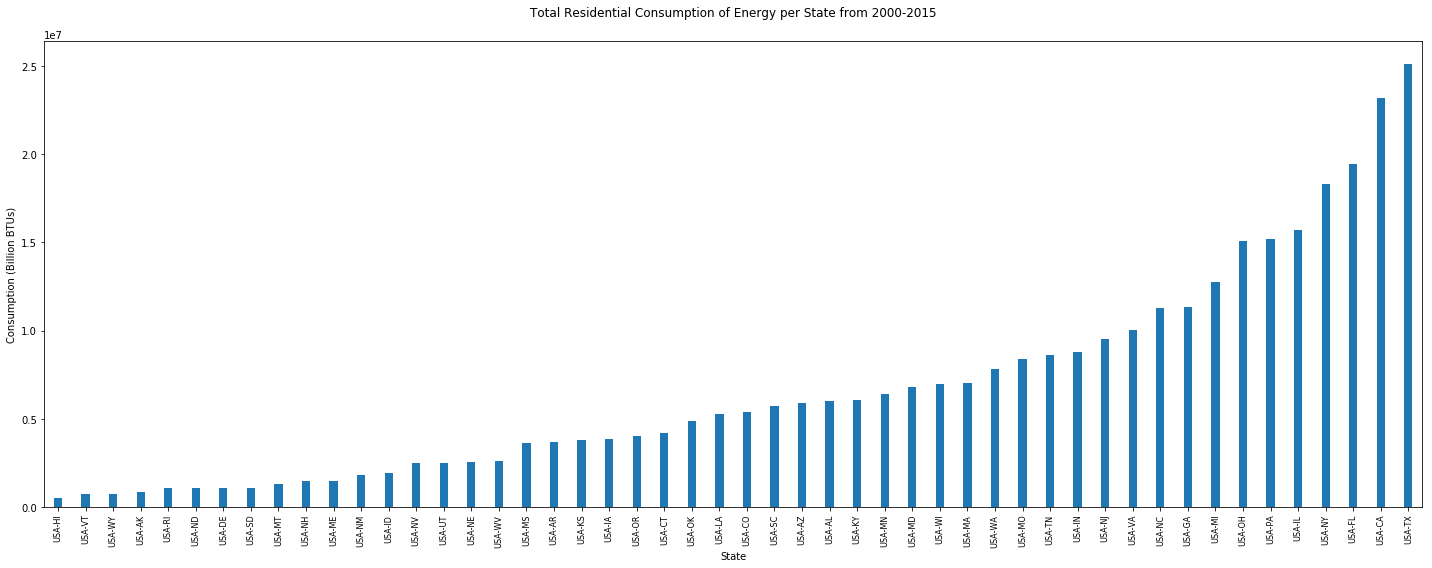

In [11]:
#res_df = res_consumption_df.drop(['USA'])
res_df = res_consumption_df.sort_values('SubTotal')
totals = res_df["SubTotal"]
states = res_df.index.values
ttl = "Total Residential Consumption of Energy per State from 2000-2015"
x = states
y = totals.values
x_position = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50]
plt.figure(figsize=(20,8))
plt.bar(x, y, width=0.3, align="center")
plt.title(ttl, pad=25)
plt.xlabel("State")
plt.ylabel("Consumption (Billion BTUs)")
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.xlim(-0.5, (len(x) - 0.5))
plt.tight_layout()
plt.show()

In [12]:
#Commercial Total Energy Consumed excluding DC and USA
com_series_stateids =["SEDS.TECCB.AL.A", "SEDS.TECCB.AK.A", "SEDS.TECCB.AZ.A", "SEDS.TECCB.AR.A", "SEDS.TECCB.CA.A", 
                      "SEDS.TECCB.CO.A", "SEDS.TECCB.CT.A", "SEDS.TECCB.DE.A", "SEDS.TECCB.FL.A", 
                      "SEDS.TECCB.GA.A", "SEDS.TECCB.HI.A", "SEDS.TECCB.ID.A", "SEDS.TECCB.IL.A", "SEDS.TECCB.IN.A", 
                      "SEDS.TECCB.IA.A", "SEDS.TECCB.KS.A", "SEDS.TECCB.KY.A", "SEDS.TECCB.LA.A", "SEDS.TECCB.ME.A", 
                      "SEDS.TECCB.MD.A", "SEDS.TECCB.MA.A", "SEDS.TECCB.MI.A", "SEDS.TECCB.MN.A", "SEDS.TECCB.MS.A", 
                      "SEDS.TECCB.MO.A", "SEDS.TECCB.MT.A", "SEDS.TECCB.NE.A", "SEDS.TECCB.NV.A", "SEDS.TECCB.NH.A", 
                      "SEDS.TECCB.NJ.A", "SEDS.TECCB.NM.A", "SEDS.TECCB.NY.A", "SEDS.TECCB.NC.A", "SEDS.TECCB.ND.A", 
                      "SEDS.TECCB.OH.A", "SEDS.TECCB.OK.A", "SEDS.TECCB.OR.A", "SEDS.TECCB.PA.A", "SEDS.TECCB.RI.A", 
                      "SEDS.TECCB.SC.A", "SEDS.TECCB.SD.A", "SEDS.TECCB.TN.A", "SEDS.TECCB.TX.A", "SEDS.TECCB.UT.A", 
                      "SEDS.TECCB.VT.A", "SEDS.TECCB.VA.A", "SEDS.TECCB.WA.A", "SEDS.TECCB.WV.A", "SEDS.TECCB.WI.A", 
                      "SEDS.TECCB.WY.A"]

In [13]:
energy_consumption = {}
state_name = []
year = []
consumption = []

In [14]:
for row in com_series_stateids:
    url = "http://api.eia.gov/series/?"
    query_url = url + "api_key=" + api_key + "&series_id="
    response = requests.get(query_url + row).json()['series'][0]['data'][3:19]
    name_response = requests.get(query_url + row).json()['series'][0]['geography']
        
    for item in response:
        state_name.append(name_response)
        year.append(item[0])
        consumption.append(item[1])
        
    print(response)
    print(name_response)

[['2015', 263457], ['2014', 262497], ['2013', 256750], ['2012', 244919], ['2011', 257067], ['2010', 270504], ['2009', 257060], ['2008', 271267], ['2007', 276430], ['2006', 268294], ['2005', 260757], ['2004', 257993], ['2003', 249280], ['2002', 250226], ['2001', 243613], ['2000', 250773]]
USA-AL
[['2015', 66983], ['2014', 63219], ['2013', 62922], ['2012', 69598], ['2011', 70816], ['2010', 66822], ['2009', 61825], ['2008', 64441], ['2007', 63076], ['2006', 67572], ['2005', 62403], ['2004', 63451], ['2003', 58567], ['2002', 60184], ['2001', 66274], ['2000', 69873]]
USA-AK
[['2015', 347477], ['2014', 342287], ['2013', 349984], ['2012', 343783], ['2011', 347514], ['2010', 333894], ['2009', 332909], ['2008', 342185], ['2007', 341414], ['2006', 333127], ['2005', 322978], ['2004', 313878], ['2003', 310692], ['2002', 311230], ['2001', 312480], ['2000', 314579]]
USA-AZ
[['2015', 179155], ['2014', 182202], ['2013', 176523], ['2012', 170147], ['2011', 174604], ['2010', 174500], ['2009', 164583], [

[['2015', 72019], ['2014', 71056], ['2013', 69952], ['2012', 66272], ['2011', 66407], ['2010', 66146], ['2009', 67673], ['2008', 68326], ['2007', 69762], ['2006', 68970], ['2005', 76208], ['2004', 73636], ['2003', 72415], ['2002', 68997], ['2001', 66199], ['2000', 65847]]
USA-NH
[['2015', 596251], ['2014', 631418], ['2013', 607669], ['2012', 607156], ['2011', 635590], ['2010', 632896], ['2009', 633627], ['2008', 639790], ['2007', 652547], ['2006', 621617], ['2005', 654297], ['2004', 638074], ['2003', 610226], ['2002', 581672], ['2001', 557204], ['2000', 581258]]
USA-NJ
[['2015', 125176], ['2014', 125903], ['2013', 126204], ['2012', 125840], ['2011', 126817], ['2010', 123544], ['2009', 120498], ['2008', 126755], ['2007', 127619], ['2006', 124580], ['2005', 126015], ['2004', 124480], ['2003', 122862], ['2002', 129406], ['2001', 124883], ['2000', 123410]]
USA-NM
[['2015', 1141606], ['2014', 1137388], ['2013', 1133300], ['2012', 1098242], ['2011', 1183095], ['2010', 1213503], ['2009', 1198

In [15]:
com_df_info = pd.DataFrame({"State" : state_name, "Year" : year, "Consumption" : consumption})
com_df_info.head()

,State,Year,Consumption
0,USA-AL,2015,263457
1,USA-AL,2014,262497
2,USA-AL,2013,256750
3,USA-AL,2012,244919
4,USA-AL,2011,257067


In [16]:
state = com_df_info["State"].unique()
y2015 = com_df_info.loc[com_df_info["Year"] == "2015",:]   
y2015_data = y2015["Consumption"].values

y2014 = com_df_info.loc[com_df_info["Year"] == "2014",:]   
y2014_data = y2014["Consumption"].values

y2013 = com_df_info.loc[com_df_info["Year"] == "2013",:]   
y2013_data = y2013["Consumption"].values

y2012 = com_df_info.loc[com_df_info["Year"] == "2012",:]   
y2012_data = y2012["Consumption"].values

y2011 = com_df_info.loc[com_df_info["Year"] == "2011",:]   
y2011_data = y2011["Consumption"].values

y2010 = com_df_info.loc[com_df_info["Year"] == "2010",:]   
y2010_data = y2010["Consumption"].values

y2009 = com_df_info.loc[com_df_info["Year"] == "2009",:]   
y2009_data = y2009["Consumption"].values

y2008 = com_df_info.loc[com_df_info["Year"] == "2008",:]   
y2008_data = y2008["Consumption"].values

y2007 = com_df_info.loc[com_df_info["Year"] == "2007",:]   
y2007_data = y2007["Consumption"].values

y2006 = com_df_info.loc[com_df_info["Year"] == "2006",:]   
y2006_data = y2006["Consumption"].values

y2005 = com_df_info.loc[com_df_info["Year"] == "2005",:]   
y2005_data = y2005["Consumption"].values

y2004 = com_df_info.loc[com_df_info["Year"] == "2004",:]   
y2004_data = y2004["Consumption"].values

y2003 = com_df_info.loc[com_df_info["Year"] == "2003",:]   
y2003_data = y2003["Consumption"].values

y2002 = com_df_info.loc[com_df_info["Year"] == "2002",:]   
y2002_data = y2002["Consumption"].values

y2001 = com_df_info.loc[com_df_info["Year"] == "2001",:]   
y2001_data = y2001["Consumption"].values

y2000 = com_df_info.loc[com_df_info["Year"] == "2000",:]   
y2000_data = y2000["Consumption"].values

In [17]:
com_consumption_df = pd.DataFrame({"State":state, "2015":y2015_data, "2014":y2014_data, "2013":y2013_data, "2012":y2012_data,
                                   "2011":y2011_data, "2010":y2010_data, "2009":y2009_data, "2008":y2008_data, "2007":y2007_data,
                                   "2006":y2006_data, "2005":y2005_data, "2004":y2004_data, "2003":y2003_data, "2002":y2002_data,
                                   "2001":y2001_data, "2000":y2000_data})
com_consumption_df.head()

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AL,263457,262497,256750,244919,257067,270504,257060,271267,276430,268294,260757,257993,249280,250226,243613,250773
1,USA-AK,66983,63219,62922,69598,70816,66822,61825,64441,63076,67572,62403,63451,58567,60184,66274,69873
2,USA-AZ,347477,342287,349984,343783,347514,333894,332909,342185,341414,333127,322978,313878,310692,311230,312480,314579
3,USA-AR,179155,182202,176523,170147,174604,174500,164583,166933,162806,158434,163193,153539,153730,151491,150150,146310
4,USA-CA,1462756,1432703,1430427,1488960,1538314,1510438,1514229,1572133,1536055,1521164,1484593,1535683,1422511,1453641,1443700,1354275


In [18]:
com_consumption_df = com_consumption_df.set_index('State')
com_consumption_df['SubTotal'] = (com_consumption_df['2015'] + com_consumption_df['2014'] + com_consumption_df['2013'] +
                               com_consumption_df['2012'] + com_consumption_df['2011'] + com_consumption_df['2010'] +
                               com_consumption_df['2009'] + com_consumption_df['2008'] + com_consumption_df['2007'] +
                               com_consumption_df['2006'] + com_consumption_df['2005'] + com_consumption_df['2004'] +
                               com_consumption_df['2003'] + com_consumption_df['2002'] + com_consumption_df['2001'] +
                               com_consumption_df['2000'])
com_consumption_df.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
State,,,,,,,,,,,,,,,,,
USA-AL,263457,262497,256750,244919,257067,270504,257060,271267,276430,268294,260757,257993,249280,250226,243613,250773,4140887
USA-AK,66983,63219,62922,69598,70816,66822,61825,64441,63076,67572,62403,63451,58567,60184,66274,69873,1038026
USA-AZ,347477,342287,349984,343783,347514,333894,332909,342185,341414,333127,322978,313878,310692,311230,312480,314579,5300411
USA-AR,179155,182202,176523,170147,174604,174500,164583,166933,162806,158434,163193,153539,153730,151491,150150,146310,2628300
USA-CA,1462756,1432703,1430427,1488960,1538314,1510438,1514229,1572133,1536055,1521164,1484593,1535683,1422511,1453641,1443700,1354275,23701582


In [19]:
com_consumption_df.to_csv("Commercial_Energy_Consumption.csv")

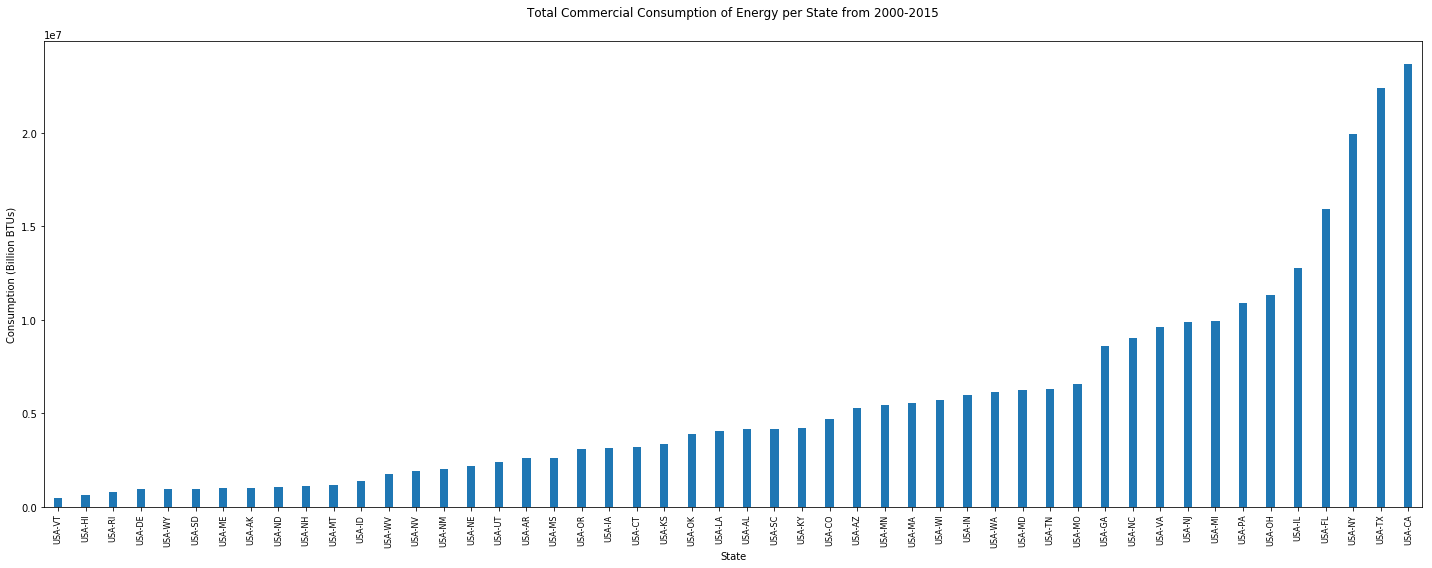

In [20]:
com_df = com_consumption_df.sort_values('SubTotal')
totals = com_df["SubTotal"]
states = com_df.index.values
ttl = "Total Commercial Consumption of Energy per State from 2000-2015"
x = states
y = totals.values
x_position = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50]
plt.figure(figsize=(20,8))
plt.bar(x, y, width=0.3, align="center")
plt.title(ttl, pad=25)
plt.xlabel("State")
plt.ylabel("Consumption (Billion BTUs)")
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.xlim(-0.5, (len(x) - 0.5))
plt.tight_layout()
plt.show()

In [21]:
#Industrial Total Energy Consumed excluding DC and USA
ind_series_stateids =["SEDS.TEICB.AL.A", "SEDS.TEICB.AK.A", "SEDS.TEICB.AZ.A", "SEDS.TEICB.AR.A", "SEDS.TEICB.CA.A", 
                      "SEDS.TEICB.CO.A", "SEDS.TEICB.CT.A", "SEDS.TEICB.DE.A", "SEDS.TEICB.FL.A", 
                      "SEDS.TEICB.GA.A", "SEDS.TEICB.HI.A", "SEDS.TEICB.ID.A", "SEDS.TEICB.IL.A", "SEDS.TEICB.IN.A", 
                      "SEDS.TEICB.IA.A", "SEDS.TEICB.KS.A", "SEDS.TEICB.KY.A", "SEDS.TEICB.LA.A", "SEDS.TEICB.ME.A", 
                      "SEDS.TEICB.MD.A", "SEDS.TEICB.MA.A", "SEDS.TEICB.MI.A", "SEDS.TEICB.MN.A", "SEDS.TEICB.MS.A", 
                      "SEDS.TEICB.MO.A", "SEDS.TEICB.MT.A", "SEDS.TEICB.NE.A", "SEDS.TEICB.NV.A", "SEDS.TEICB.NH.A", 
                      "SEDS.TEICB.NJ.A", "SEDS.TEICB.NM.A", "SEDS.TEICB.NY.A", "SEDS.TEICB.NC.A", "SEDS.TEICB.ND.A", 
                      "SEDS.TEICB.OH.A", "SEDS.TEICB.OK.A", "SEDS.TEICB.OR.A", "SEDS.TEICB.PA.A", "SEDS.TEICB.RI.A", 
                      "SEDS.TEICB.SC.A", "SEDS.TEICB.SD.A", "SEDS.TEICB.TN.A", "SEDS.TEICB.TX.A", "SEDS.TEICB.UT.A", 
                      "SEDS.TEICB.VT.A", "SEDS.TEICB.VA.A", "SEDS.TEICB.WA.A", "SEDS.TEICB.WV.A", "SEDS.TEICB.WI.A", 
                      "SEDS.TEICB.WY.A"]

In [22]:
energy_consumption = {}
state_name = []
year = []
consumption = []

In [23]:
for row in ind_series_stateids:
    url = "http://api.eia.gov/series/?"
    query_url = url + "api_key=" + api_key + "&series_id="
    response = requests.get(query_url + row).json()['series'][0]['data'][3:19]
    name_response = requests.get(query_url + row).json()['series'][0]['geography']
        
    for item in response:
        state_name.append(name_response)
        year.append(item[0])
        consumption.append(item[1])
        
    print(response)
    print(name_response)

[['2015', 823765], ['2014', 861143], ['2013', 850439], ['2012', 835514], ['2011', 804046], ['2010', 774098], ['2009', 711199], ['2008', 876097], ['2007', 915657], ['2006', 933217], ['2005', 930987], ['2004', 941966], ['2003', 877629], ['2002', 857704], ['2001', 849465], ['2000', 990428]]
USA-AL
[['2015', 331209], ['2014', 330421], ['2013', 334286], ['2012', 339183], ['2011', 331420], ['2010', 326937], ['2009', 334430], ['2008', 317535], ['2007', 356533], ['2006', 353673], ['2005', 418115], ['2004', 389872], ['2003', 402842], ['2002', 411348], ['2001', 409960], ['2000', 401675]]
USA-AK
[['2015', 236211], ['2014', 236530], ['2013', 213634], ['2012', 220120], ['2011', 224978], ['2010', 208272], ['2009', 197015], ['2008', 232755], ['2007', 221076], ['2006', 226196], ['2005', 220120], ['2004', 224216], ['2003', 198138], ['2002', 204137], ['2001', 213987], ['2000', 225886]]
USA-AZ
[['2015', 377764], ['2014', 412848], ['2013', 412235], ['2012', 405144], ['2011', 421820], ['2010', 410689], ['2

[['2015', 41806], ['2014', 43179], ['2013', 42820], ['2012', 40058], ['2011', 40228], ['2010', 39217], ['2009', 36822], ['2008', 42240], ['2007', 43603], ['2006', 46242], ['2005', 51690], ['2004', 54173], ['2003', 52118], ['2002', 47723], ['2001', 53319], ['2000', 57848]]
USA-NH
[['2015', 262799], ['2014', 259397], ['2013', 271076], ['2012', 274978], ['2011', 276945], ['2010', 271319], ['2009', 263184], ['2008', 316726], ['2007', 366890], ['2006', 365106], ['2005', 390565], ['2004', 386626], ['2003', 396163], ['2002', 425522], ['2001', 442134], ['2000', 411502]]
USA-NJ
[['2015', 226406], ['2014', 230243], ['2013', 220821], ['2012', 226028], ['2011', 223188], ['2010', 214491], ['2009', 210928], ['2008', 229467], ['2007', 250591], ['2006', 227343], ['2005', 223823], ['2004', 226458], ['2003', 216061], ['2002', 200533], ['2001', 203276], ['2000', 211854]]
USA-NM
[['2015', 398455], ['2014', 395920], ['2013', 396149], ['2012', 356211], ['2011', 365370], ['2010', 359588], ['2009', 358775], [

In [24]:
ind_df_info = pd.DataFrame({"State" : state_name, "Year" : year, "Consumption" : consumption})
ind_df_info.head()

,State,Year,Consumption
0,USA-AL,2015,823765
1,USA-AL,2014,861143
2,USA-AL,2013,850439
3,USA-AL,2012,835514
4,USA-AL,2011,804046


In [25]:
state = ind_df_info["State"].unique()
y2015 = ind_df_info.loc[ind_df_info["Year"] == "2015",:]   
y2015_data = y2015["Consumption"].values

y2014 = ind_df_info.loc[ind_df_info["Year"] == "2014",:]   
y2014_data = y2014["Consumption"].values

y2013 = ind_df_info.loc[ind_df_info["Year"] == "2013",:]   
y2013_data = y2013["Consumption"].values

y2012 = ind_df_info.loc[ind_df_info["Year"] == "2012",:]   
y2012_data = y2012["Consumption"].values

y2011 = ind_df_info.loc[ind_df_info["Year"] == "2011",:]   
y2011_data = y2011["Consumption"].values

y2010 = ind_df_info.loc[ind_df_info["Year"] == "2010",:]   
y2010_data = y2010["Consumption"].values

y2009 = ind_df_info.loc[ind_df_info["Year"] == "2009",:]   
y2009_data = y2009["Consumption"].values

y2008 = ind_df_info.loc[ind_df_info["Year"] == "2008",:]   
y2008_data = y2008["Consumption"].values

y2007 = ind_df_info.loc[ind_df_info["Year"] == "2007",:]   
y2007_data = y2007["Consumption"].values

y2006 = ind_df_info.loc[ind_df_info["Year"] == "2006",:]   
y2006_data = y2006["Consumption"].values

y2005 = ind_df_info.loc[ind_df_info["Year"] == "2005",:]   
y2005_data = y2005["Consumption"].values

y2004 = ind_df_info.loc[ind_df_info["Year"] == "2004",:]   
y2004_data = y2004["Consumption"].values

y2003 = ind_df_info.loc[ind_df_info["Year"] == "2003",:]   
y2003_data = y2003["Consumption"].values

y2002 = ind_df_info.loc[ind_df_info["Year"] == "2002",:]   
y2002_data = y2002["Consumption"].values

y2001 = ind_df_info.loc[ind_df_info["Year"] == "2001",:]   
y2001_data = y2001["Consumption"].values

y2000 = ind_df_info.loc[ind_df_info["Year"] == "2000",:]   
y2000_data = y2000["Consumption"].values

In [26]:
ind_consumption_df = pd.DataFrame({"State":state, "2015":y2015_data, "2014":y2014_data, "2013":y2013_data, "2012":y2012_data,
                                   "2011":y2011_data, "2010":y2010_data, "2009":y2009_data, "2008":y2008_data, "2007":y2007_data,
                                   "2006":y2006_data, "2005":y2005_data, "2004":y2004_data, "2003":y2003_data, "2002":y2002_data,
                                   "2001":y2001_data, "2000":y2000_data})
ind_consumption_df.head()

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AL,823765,861143,850439,835514,804046,774098,711199,876097,915657,933217,930987,941966,877629,857704,849465,990428
1,USA-AK,331209,330421,334286,339183,331420,326937,334430,317535,356533,353673,418115,389872,402842,411348,409960,401675
2,USA-AZ,236211,236530,213634,220120,224978,208272,197015,232755,221076,226196,220120,224216,198138,204137,213987,225886
3,USA-AR,377764,412848,412235,405144,421820,410689,365081,421531,440996,441382,431591,435855,444429,456906,447636,476543
4,USA-CA,1849780,1859203,1884895,1747060,1784583,1740127,1713404,1846322,1894789,1908391,1937656,1997588,1928700,1953103,2089449,2094271


In [27]:
ind_consumption_df = ind_consumption_df.set_index('State')
ind_consumption_df['SubTotal'] = (ind_consumption_df['2015'] + ind_consumption_df['2014'] + ind_consumption_df['2013'] +
                               ind_consumption_df['2012'] + ind_consumption_df['2011'] + ind_consumption_df['2010'] +
                               ind_consumption_df['2009'] + ind_consumption_df['2008'] + ind_consumption_df['2007'] +
                               ind_consumption_df['2006'] + ind_consumption_df['2005'] + ind_consumption_df['2004'] +
                               ind_consumption_df['2003'] + ind_consumption_df['2002'] + ind_consumption_df['2001'] +
                               ind_consumption_df['2000'])
ind_consumption_df.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
State,,,,,,,,,,,,,,,,,
USA-AL,823765,861143,850439,835514,804046,774098,711199,876097,915657,933217,930987,941966,877629,857704,849465,990428,13833354
USA-AK,331209,330421,334286,339183,331420,326937,334430,317535,356533,353673,418115,389872,402842,411348,409960,401675,5789439
USA-AZ,236211,236530,213634,220120,224978,208272,197015,232755,221076,226196,220120,224216,198138,204137,213987,225886,3503271
USA-AR,377764,412848,412235,405144,421820,410689,365081,421531,440996,441382,431591,435855,444429,456906,447636,476543,6802450
USA-CA,1849780,1859203,1884895,1747060,1784583,1740127,1713404,1846322,1894789,1908391,1937656,1997588,1928700,1953103,2089449,2094271,30229321


In [28]:
ind_consumption_df.to_csv("Industrial_Energy_Consumption.csv")

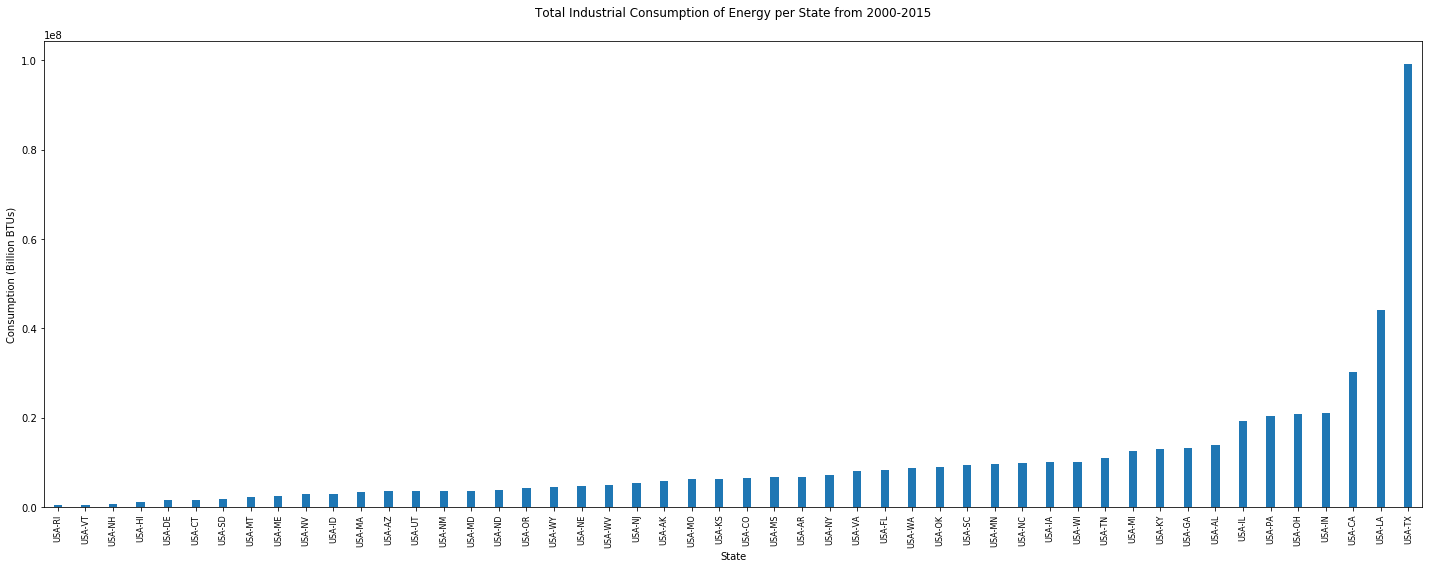

In [30]:
#ind_df = com_consumption_df.drop(['USA'])
ind_df = ind_consumption_df.sort_values('SubTotal')
totals = ind_df["SubTotal"]
states = ind_df.index.values
ttl = "Total Industrial Consumption of Energy per State from 2000-2015"
x = states
y = totals.values
x_position = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50]
plt.figure(figsize=(20,8))
plt.bar(x, y, width=0.3, align="center")
plt.title(ttl, pad=25)
plt.xlabel("State")
plt.ylabel("Consumption (Billion BTUs)")
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.xlim(-0.5, (len(x) - 0.5))
plt.tight_layout()
plt.show()

In [31]:
#Pull up Residential Energy Consumption throughout 50 states (including USA totals) dataframe from CSV file
df_res = pd.read_csv (r'Residential_Energy_Consumption.csv')
print (df_res)

     State     2015     2014     2013     2012     2011     2010     2009  \
0   USA-AL   349230   378853   358238   338290   377607   419277   372781   
1   USA-AK    53136    47823    48810    54597    53939    52253    53536   
2   USA-AZ   385477   377963   389450   378865   391384   376625   373842   
3   USA-AR   228573   246790   241000   222034   247420   253858   226791   
4   USA-CA  1347807  1355062  1440463  1437024  1500559  1466657  1483981   
5   USA-CO   347377   353334   363327   335025   354262   352304   339585   
6   USA-CT   251763   248119   245613   232769   238420   251419   253184   
7   USA-DE    65665    66613    64890    62032    67909    72461    68693   
8   USA-FL  1207549  1177125  1147013  1128534  1191486  1271713  1223002   
9   USA-GA   697029   741983   686812   671729   747018   819871   726627   
10  USA-HI    31575    31411    30848    31530    32506    32681    33307   
11  USA-ID   122911   119891   127028   116608   125277   120873   127606   

In [32]:
#Pull up Commercial and Industrial Energy Consumption throughout 50 states (including USA totals) dataframe
# from CSV file
df_com = pd.read_csv (r'Commercial_Energy_Consumption.csv')
print (df_com)

     State     2015     2014     2013     2012     2011     2010     2009  \
0   USA-AL   263457   262497   256750   244919   257067   270504   257060   
1   USA-AK    66983    63219    62922    69598    70816    66822    61825   
2   USA-AZ   347477   342287   349984   343783   347514   333894   332909   
3   USA-AR   179155   182202   176523   170147   174604   174500   164583   
4   USA-CA  1462756  1432703  1430427  1488960  1538314  1510438  1514229   
5   USA-CO   290564   284107   286702   277734   287990   287485   297449   
6   USA-CT   199411   192330   188086   183405   184351   190625   187058   
7   USA-DE    57364    57866    56940    56847    59093    63083    62977   
8   USA-FL  1013873   975609   968255   957462   969582   990021  1007221   
9   USA-GA   551841   549710   531508   537457   564498   581280   551528   
10  USA-HI    41330    41137    40590    39187    41157    40111    40682   
11  USA-ID    88995    86953    88008    83213    85263    82887    84725   

In [33]:
#Pull up Commercial and Industrial Energy Consumption throughout 50 states (including USA totals) dataframe
# from CSV file
df_ind = pd.read_csv (r'Industrial_Energy_Consumption.csv')
print (df_ind)

     State     2015     2014     2013     2012     2011     2010     2009  \
0   USA-AL   823765   861143   850439   835514   804046   774098   711199   
1   USA-AK   331209   330421   334286   339183   331420   326937   334430   
2   USA-AZ   236211   236530   213634   220120   224978   208272   197015   
3   USA-AR   377764   412848   412235   405144   421820   410689   365081   
4   USA-CA  1849780  1859203  1884895  1747060  1784583  1740127  1713404   
5   USA-CO   440348   431776   415087   421180   421232   455480   414088   
6   USA-CT    78393    85921    88143    83352    86015    88602    87157   
7   USA-DE    89074    87476    90725    92276    85081    50473    58909   
8   USA-FL   491793   466723   479455   473873   478130   501511   466630   
9   USA-GA   779445   781878   752752   726326   754966   758769   707159   
10  USA-HI    64236    64558    65419    65113    67545    68068    69087   
11  USA-ID   174169   178290   177849   180791   178557   181584   167397   

In [39]:
#Merge 3 DataFrames together
df_merged = pd.merge(df_res, df_com, on="State", suffixes=('', "_Com"))
df_merged

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,2008_Com,2007_Com,2006_Com,2005_Com,2004_Com,2003_Com,2002_Com,2001_Com,2000_Com,SubTotal_Com
0,USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,...,271267,276430,268294,260757,257993,249280,250226,243613,250773,4140887
1,USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,...,64441,63076,67572,62403,63451,58567,60184,66274,69873,1038026
2,USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,...,342185,341414,333127,322978,313878,310692,311230,312480,314579,5300411
3,USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,...,166933,162806,158434,163193,153539,153730,151491,150150,146310,2628300
4,USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,...,1572133,1536055,1521164,1484593,1535683,1422511,1453641,1443700,1354275,23701582
5,USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,...,302273,293354,294859,294962,292485,298307,307369,297225,291783,4684648
6,USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,...,195646,211813,195013,207783,207537,225273,209010,214170,220325,3211836
7,USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,...,61607,60347,57891,58749,57214,57000,58139,51981,58864,935962
8,USA-FL,1207549,1177125,1147013,1128534,1191486,1271713,1223002,1216701,1254926,...,1034041,1040386,1033460,1030708,1021070,994939,995300,951670,949471,15933068
9,USA-GA,697029,741983,686812,671729,747018,819871,726627,737925,735842,...,565938,564130,545052,544485,535357,504154,484042,491608,492204,8594792


In [40]:
df_merged_final = pd.merge(df_merged, df_ind, on="State", suffixes=("_Res", "_Ind"))
#df_merged_final = df_merged_final.drop([50])
df_merged_final

,State,2015_Res,2014_Res,2013_Res,2012_Res,2011_Res,2010_Res,2009_Res,2008_Res,2007_Res,...,2008_Ind,2007_Ind,2006_Ind,2005_Ind,2004_Ind,2003_Ind,2002_Ind,2001_Ind,2000_Ind,SubTotal_Ind
0,USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,...,876097,915657,933217,930987,941966,877629,857704,849465,990428,13833354
1,USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,...,317535,356533,353673,418115,389872,402842,411348,409960,401675,5789439
2,USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,...,232755,221076,226196,220120,224216,198138,204137,213987,225886,3503271
3,USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,...,421531,440996,441382,431591,435855,444429,456906,447636,476543,6802450
4,USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,...,1846322,1894789,1908391,1937656,1997588,1928700,1953103,2089449,2094271,30229321
5,USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,...,412273,405162,396319,387747,376686,371668,356356,378721,312254,6396377
6,USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,...,81049,107395,111351,118448,116461,122066,107708,114029,124719,1600809
7,USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,...,90123,90639,92197,97921,95307,109899,113831,113066,112954,1469951
8,USA-FL,1207549,1177125,1147013,1128534,1191486,1271713,1223002,1216701,1254926,...,518118,525469,551744,535556,530146,544761,531592,559778,559871,8215150
9,USA-GA,697029,741983,686812,671729,747018,819871,726627,737925,735842,...,777325,853354,881249,886636,919986,884294,931985,845079,911983,13153186


In [41]:
#Create new DataFRame with just subtotals per sector
subtotal_df = df_merged_final[["State", "SubTotal_Res", "SubTotal_Com", "SubTotal_Ind"]]
subtotal_df["Total"]=(subtotal_df["SubTotal_Res"]+subtotal_df["SubTotal_Com"]+subtotal_df["SubTotal_Ind"])
subtotal_df = subtotal_df.sort_values("Total")
subtotal_df

c:\users\mainframe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State,SubTotal_Res,SubTotal_Com,SubTotal_Ind,Total
44,USA-VT,715960,458734,402544,1577238
38,USA-RI,1050695,785946,386924,2223565
10,USA-HI,522476,637866,1098713,2259055
28,USA-NH,1445360,1109885,733086,3288331
7,USA-DE,1068684,935962,1469951,3474597
40,USA-SD,1086823,952357,1835031,3874211
25,USA-MT,1310176,1156888,2282938,4750002
18,USA-ME,1464944,1001218,2458008,4924170
33,USA-ND,1056081,1062109,3758544,5876734
49,USA-WY,717771,942984,4438925,6099680


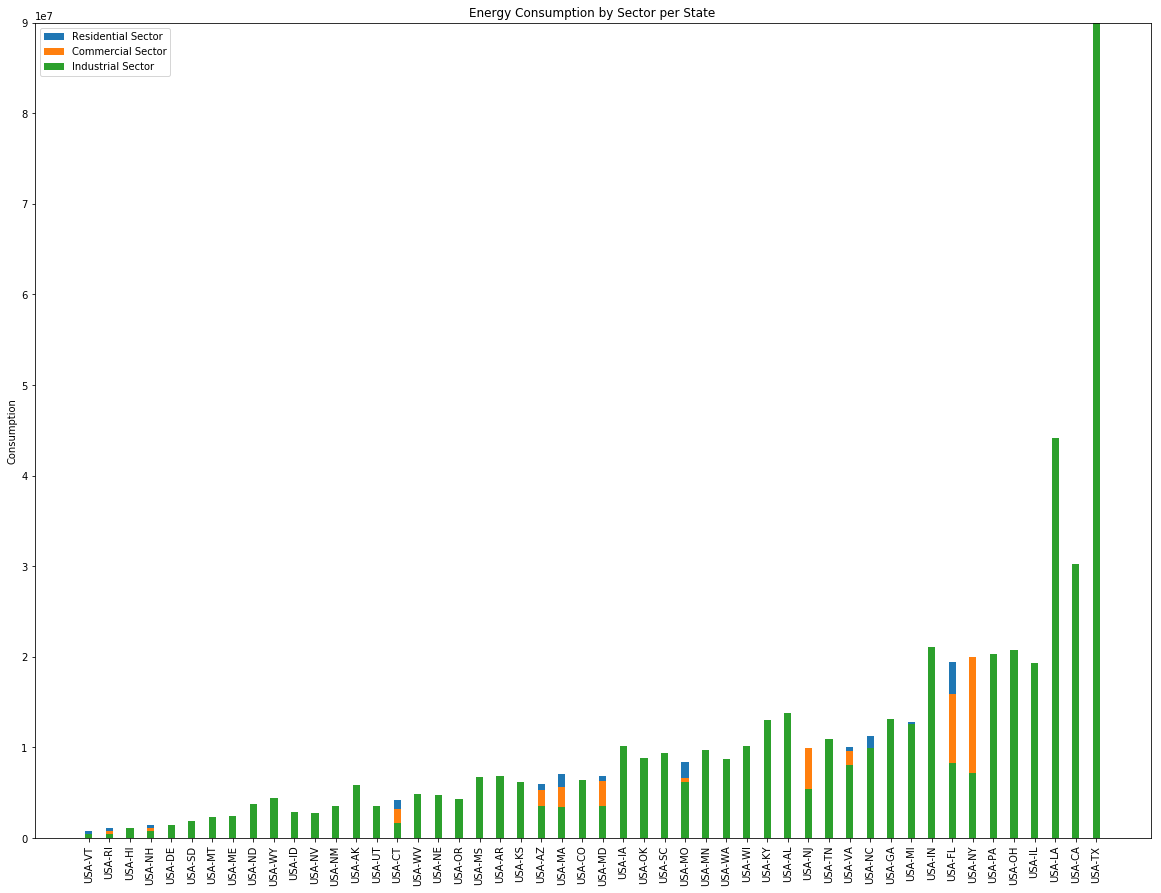

In [44]:
#Create a stacked bar chart to visualize energy consumption by sector per state

plt.figure(figsize=(20,15))

width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(subtotal_df["State"], subtotal_df["SubTotal_Res"], width)
p2 = plt.bar(subtotal_df["State"], subtotal_df["SubTotal_Com"], width)
p3 = plt.bar(subtotal_df["State"], subtotal_df["SubTotal_Ind"], width)

plt.ylabel('Consumption')
plt.title('Energy Consumption by Sector per State')
plt.xticks(rotation='vertical')
plt.ylim(0,90000000)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Residential Sector', 'Commercial Sector', 'Industrial Sector' ))
plt.savefig('Energy_Consumption_Sector_State.png')
plt.show()